# Pandas

* `pandas` is a Python library providing data structures and data analysis tools.  
* Think of it like Excel for Python, but __WAY__ more powerful. 
* It is designed to make working with relational or labeled data both easy and intuitive.

### Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.
* Easy handling of missing data (represented as NaN) 
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### Limitations

* It is a general purpose data analysis tool, and there is an inherent trade-off between flexibility and specificity.
* As such, there may be other tools that are faster for certain well-defined applications. 
* For example, once you know your data inside-and-out, and have a robust pipeline, you can use numpy directly for computations.

### Documentation

* http://pandas.pydata.org/pandas-docs/stable/index.html

## Today's Objectives

* Create `Series` and `DataFrame`s from Python data types. 
* Create `DataFrame`s from on disk data.
* Index and Slice `pandas` objects.
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Pandas is built on Numpy
* Numpy is one of the fundamental packages for scientific computing in Python.
* Before we dive into `pandas`, let's review `numpy`


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Just how much faster are they? Let's take the numbers from 0 to 1 million, and sum those numbers, timing it with both a list and a numpy array.


In [2]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

In [3]:
%%timeit
# python built-ins
sum(python_list)

24.1 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
# numpy array with numpy sum
np.sum(numpy_array)

503 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%%timeit
# but beware! combining a numpy array with standard library sum is slower than either one!
sum(numpy_array)

98 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Numpy NdArrays

* have types
* Each array is of one type

In [6]:
ints = np.array(range(5))
floats = np.array(np.random.rand(5,))
bools = np.array([True]*5)
chars = np.array(list('ABCDE'))
strings = np.array(['A','BC',"DEF", "GHIJ", "KLMNO"])

`numpy.dtype` describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. It describes the following aspects of the data:

- `type` : integer, float, Python object, etc...
- `itemsize` : number of bytes used to represent the data type
- `byteorder` : little-endian or big-endian
- `fields` : a dictionary of named fields defined for this data type,

See https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html#attributes for a full list

In [7]:
dt = ints.dtype
print(dt.type)
print(dt.itemsize)
print(dt.byteorder)
print(dt.fields)
print(dt.type is int)
print(dt.type is np.int64)

<class 'numpy.int64'>
8
=
None
False
True


In [8]:
dt = bools.dtype
print(dt.type)
print(dt.itemsize)
print(dt.byteorder)
print(dt.fields)
print(dt.type is bool)
print(dt.type is np.bool_)

<class 'numpy.bool_'>
1
|
None
False
True


In [9]:
print(ints.dtype)
print(floats.dtype)
print(bools.dtype)
print(chars.dtype) # little-endian unicode string of max length 1 
print(strings.dtype) # little-endian unicode string of max length 5 

int64
float64
bool
<U1
<U5


You can also specify the dtype directly, but this is rarely done in practice

In [10]:
dt = np.dtype('i4')   # 32-bit signed integer
dt = np.dtype('f8')   # 64-bit floating-point number
dt = np.dtype('c16')  # 128-bit complex floating-point number
dt = np.dtype('a25')  # 25-length zero-terminated bytes
dt = np.dtype('U25')  # 25-character string

## Creating and using NdArrays

In [11]:
ndarray_from_list = np.array([1, 2, 3, 4, 5])
ndarray_from_tuple = np.array((1, 2, 3, 4, 5), np.int32) 

In [12]:
print(ndarray_from_list.dtype)
print(ndarray_from_tuple.dtype)

int64
int32


In [13]:
print(ndarray_from_list.shape)
print(ndarray_from_tuple.shape)

(5,)
(5,)


## Multi D

In [14]:
nd_arr = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
nd_arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

## Access elemens in an ndarray
* Individual data
* Slices of data

In [15]:
nd_arr[1,1]

7

In [16]:
nd_arr[0:2,0:2]

array([[1, 2],
       [6, 7]])

In [17]:
nd_arr.shape

(3, 5)

In [18]:
nd_arr.sum()

120

In [19]:
nd_arr.sum(axis=1)

array([15, 40, 65])

In [20]:
nd_arr.max()

15

In [21]:
index_corresponding_to_max_value = nd_arr.argmax()
nd_arr.ravel()[index_corresponding_to_max_value]

15

## Broadcasting
Broadcasting is your best friend and potentially your worst enemy.  
Do not broadcast blindly! This may cause unexpected results.  
Broadcasting and reshaping ndarrays will become paramount when we get to linear algebra.

In [22]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print (a)
print (b)
print (a + b)

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations

[[ 10]
 [-10]]
[[ 1  2]
 [-1 -2]]
[[ 11  12]
 [-11 -12]]


In [23]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,0]]) 

print (a)
print (b)

try:
    print (a + b)
except ValueError as e:
    print('ERROR: {}'.format(e))
    
# it's not clear how it should fill up in this case... so it can't/doesn't

[[ 10   0 -10   0]
 [-10   0 -10   0]]
[[ 2  2]
 [-1  0]]
ERROR: operands could not be broadcast together with shapes (2,4) (2,2) 


----------------------------------------------------
Okay we made it. Now we can indulge in Pandas.

# Pandas 


## Pandas Series
`pandas.series` are one dimensional np.ndarray vectors **with an index**

In [24]:
pd.Series([5775, 373, 7, 42, np.nan, 33])

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64

In [25]:
pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
8      None
dtype: object

## Datetime Index

In [26]:
# Datetime index
dt_index = pd.date_range(start='2015-1-1', end='2015-11-1', freq='m')
dt_series = pd.Series(data= np.random.randn(10), index = dt_index)
dt_series

2015-01-31   -0.618282
2015-02-28   -1.085861
2015-03-31    0.386984
2015-04-30   -1.833528
2015-05-31   -0.161094
2015-06-30   -1.173055
2015-07-31    1.902626
2015-08-31   -0.045110
2015-09-30    0.742301
2015-10-31   -0.314898
Freq: M, dtype: float64

In [27]:
dt_series[pd.to_datetime('2015-02-28')]
dt_series['2015-02-28']

-1.0858611073172153

## General Indexing
- Pandas makes excellent use of informative indexes. 
- An index works like a dictionary key, enabling fast lookups of the data associated with the index.
- Indexes also enable fast group-by, merge and time-series operations.
- When you're really in the zone with pandas, you'll be thinking about indexes all the time.

In [28]:
series_1 = pd.Series(np.random.randn(5), index = ['California', 'Alabama', 'Indiana', 'Montana', 'Kentucky'])
series_2 = pd.Series(np.random.randn(5), index = ['Washington', 'Alabama', 'Montana', 'Indiana', 'New York'])

Pandas uses the index by default to align series for mathematical operations

In [29]:
series_1 + series_2

Alabama      -2.541981
California         NaN
Indiana       0.154578
Kentucky           NaN
Montana       0.937913
New York           NaN
Washington         NaN
dtype: float64

## DataFrames
`pandas.DataFrames` are set of `pandas.Series` that share the same index.  
There is more than one way to skin a cat.

In [30]:
pd.DataFrame({'a': [1,2], 'b': [2,5], 'c': [3,6]}, index=['foo', 'bar'])

,a,b,c
foo,1,2,3
bar,2,5,6


In [31]:
pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]],
             columns=['a', 'b', 'c'],
             index=['foo', 'bar']
            )

,a,b,c
foo,1,2,3
bar,4,5,6


In [32]:
df = pd.DataFrame(np.random.randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,0.569783,-0.590309,-1.462365,-0.808730,-1.641976
2015-02-28,-0.740939,1.463943,-0.433972,-0.930344,-0.277969
2015-03-31,0.471979,-0.643072,0.545714,-0.711665,-1.187597
2015-04-30,-0.629146,0.979356,-0.056788,0.257361,0.295568
2015-05-31,2.313291,0.968236,-0.893202,2.246387,1.340976
2015-06-30,0.519482,0.183791,0.384191,-0.891386,-1.120959
2015-07-31,0.388901,-0.395221,-0.118232,1.116417,-0.790306
2015-08-31,-1.068490,1.127214,-1.548453,0.201614,0.088437
2015-09-30,-0.913198,0.050656,2.153587,-1.159931,2.165002
2015-10-31,0.592150,-2.399350,1.060420,-1.077695,0.266017


In [33]:
# each dataframe column is a series:
col = df.a
type(col)

pandas.core.series.Series

In [34]:
# so is each row.
row = df.loc['2015-01-31']
type(row)

pandas.core.series.Series

In [35]:
# The columns all have the same index: The row names!
col.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [36]:
# What's the index for the rows? the column names!
row.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Slice or View of a DataFrame

In [37]:
# When one row is returned it is a Series (not a dataframe) 
df.a

2015-01-31    0.569783
2015-02-28   -0.740939
2015-03-31    0.471979
2015-04-30   -0.629146
2015-05-31    2.313291
2015-06-30    0.519482
2015-07-31    0.388901
2015-08-31   -1.068490
2015-09-30   -0.913198
2015-10-31    0.592150
Freq: M, Name: a, dtype: float64

In [38]:
df['a']

2015-01-31    0.569783
2015-02-28   -0.740939
2015-03-31    0.471979
2015-04-30   -0.629146
2015-05-31    2.313291
2015-06-30    0.519482
2015-07-31    0.388901
2015-08-31   -1.068490
2015-09-30   -0.913198
2015-10-31    0.592150
Freq: M, Name: a, dtype: float64

In [39]:
# Return subset / multiple columns 
df[['a','b']]

,a,b
2015-01-31,0.569783,-0.590309
2015-02-28,-0.740939,1.463943
2015-03-31,0.471979,-0.643072
2015-04-30,-0.629146,0.979356
2015-05-31,2.313291,0.968236
2015-06-30,0.519482,0.183791
2015-07-31,0.388901,-0.395221
2015-08-31,-1.068490,1.127214
2015-09-30,-0.913198,0.050656
2015-10-31,0.592150,-2.399350


## Advanced Indexing
`.loc` `.iloc` and `.xi`

In [40]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] # Ranges by index label.

,c,d,e
2015-05-31,-0.893202,2.246387,1.340976
2015-06-30,0.384191,-0.891386,-1.120959
2015-07-31,-0.118232,1.116417,-0.790306
2015-08-31,-1.548453,0.201614,0.088437


In [41]:
df.iloc[2:-3, 2:5] # Ranges by index number.

,c,d,e
2015-03-31,0.545714,-0.711665,-1.187597
2015-04-30,-0.056788,0.257361,0.295568
2015-05-31,-0.893202,2.246387,1.340976
2015-06-30,0.384191,-0.891386,-1.120959
2015-07-31,-0.118232,1.116417,-0.790306


In [42]:
df.ix[2:-3,2:5] # Tries to estimate your request -- soon to be deprecated!

/Users/elliotcohen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,c,d,e
2015-03-31,0.545714,-0.711665,-1.187597
2015-04-30,-0.056788,0.257361,0.295568
2015-05-31,-0.893202,2.246387,1.340976
2015-06-30,0.384191,-0.891386,-1.120959
2015-07-31,-0.118232,1.116417,-0.790306


In [43]:
df.ix['2015-05-31':'2015-08-31', 'c':'e']

,c,d,e
2015-05-31,-0.893202,2.246387,1.340976
2015-06-30,0.384191,-0.891386,-1.120959
2015-07-31,-0.118232,1.116417,-0.790306
2015-08-31,-1.548453,0.201614,0.088437


DO NOT USE `.ix`   
We show it because you may see it in legacy code, and should know what it is.  But remember, in Python it is better to be explicit than implicit.

--------------------------------------------------------------------------------------------
## Fancy Indexing

In [44]:
dt_index = pd.date_range('2015-1-1', '2015-12-31', freq='m')
df = pd.DataFrame(np.random.randn(12,5), index=dt_index)
df.head()

,0,1,2,3,4
2015-01-31,-0.866641,1.989047,1.094875,0.893230,0.478522
2015-02-28,0.515318,-1.650824,0.341704,-0.539524,-0.804889
2015-03-31,0.539269,-1.869739,-1.019253,1.380475,0.890938
2015-04-30,0.391923,-1.374533,0.148521,0.464353,-0.426265
2015-05-31,1.525526,1.263593,0.888103,-2.053684,-1.584262


In [45]:
# Adding new column
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 4
df.head()

,0,1,2,3,4,state
2015-01-31,-0.866641,1.989047,1.094875,0.893230,0.478522,Alabama
2015-02-28,0.515318,-1.650824,0.341704,-0.539524,-0.804889,Alaska
2015-03-31,0.539269,-1.869739,-1.019253,1.380475,0.890938,Arizona
2015-04-30,0.391923,-1.374533,0.148521,0.464353,-0.426265,Alabama
2015-05-31,1.525526,1.263593,0.888103,-2.053684,-1.584262,Alaska


In [46]:
df = df.reset_index()
df.rename(columns={'index': 'date'}, inplace=True)
df = df.set_index(['state', 'date'])
df.head()

,,0,1,2,3,4
state,date,,,,,
Alabama,2015-01-31,-0.866641,1.989047,1.094875,0.893230,0.478522
Alaska,2015-02-28,0.515318,-1.650824,0.341704,-0.539524,-0.804889
Arizona,2015-03-31,0.539269,-1.869739,-1.019253,1.380475,0.890938
Alabama,2015-04-30,0.391923,-1.374533,0.148521,0.464353,-0.426265
Alaska,2015-05-31,1.525526,1.263593,0.888103,-2.053684,-1.584262


In [47]:
df.loc['Alabama'].head()

,0,1,2,3,4
date,,,,,
2015-01-31,-0.866641,1.989047,1.094875,0.893230,0.478522
2015-04-30,0.391923,-1.374533,0.148521,0.464353,-0.426265
2015-07-31,0.086169,0.951005,-0.172712,0.855689,-1.610125
2015-10-31,0.277280,-0.494926,-0.434776,1.969831,-0.959460


In [48]:
# this doesn't work because the date is not the primary (first) index
try:
    df.loc['2015-01-31']
except KeyError as e:
    print("ERROR: {}".format(e))

ERROR: 'the label [2015-01-31] is not in the [index]'


In [49]:
# but this does
df.loc[df.index.get_level_values('date') == '2015-01-31']

,,0,1,2,3,4
state,date,,,,,
Alabama,2015-01-31,-0.866641,1.989047,1.094875,0.89323,0.478522


In [50]:
df.loc[('Alabama', '2015-01-31')] #or you can do this.

0   -0.866641
1    1.989047
2    1.094875
3    0.893230
4    0.478522
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

## IO

In [51]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [52]:
df.head()  #Display the first x rows (default is 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
df.shape

(1599, 12)

In [54]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [57]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Boolean Masks

In [58]:
boolean_mask = df['chlorides'] <= df.chlorides.quantile(0.01)

In [59]:
df[boolean_mask].shape

(16, 12)

In [60]:
# we use masks all the time in pandas (and numpy for that matter)
df[df.chlorides <= df.chlorides.quantile(0.01)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
210,9.7,0.530,0.60,2.0,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
695,5.1,0.470,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
797,9.3,0.370,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7
806,8.4,0.250,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,7
836,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
837,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
861,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6
1157,5.1,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,5


In [61]:
# we can easily extend this to more conditionals in our mask
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [62]:
df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 

In [63]:
# we can also group by multilple columns by passing them in in a list. 
# pandas will group by the second column within the groups created by the first groupby. 
df.groupby(['pH', 'quality']).mean()['chlorides']

pH    quality
2.74  4          0.610000
2.86  6          0.075000
2.87  6          0.148000
2.88  5          0.084000
      8          0.072000
2.89  5          0.106000
      6          0.049000
2.90  6          0.414000
2.92  5          0.095000
      7          0.073000
2.93  5          0.110000
      6          0.110000
2.94  5          0.082000
      6          0.082000
2.95  7          0.100000
2.98  5          0.088500
      6          0.084000
      7          0.074000
      8          0.083000
2.99  5          0.101500
3.00  5          0.363250
      6          0.080000
3.01  5          0.369000
      6          0.089000
      7          0.074667
3.02  5          0.185333
      6          0.093000
      7          0.077500
3.03  5          0.247750
      6          0.102000
                   ...   
3.61  5          0.075000
      6          0.079800
3.62  4          0.096000
      5          0.113500
      6          0.056000
3.63  3          0.097000
      5          0.04900

## Add / Remove Columns

In [64]:
# compute a new feature from the data
df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pct_free_sulf
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529


In [66]:
# Drop a row
df.drop('pct_free_sulf', axis=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
# looks like the column is gone! let's check
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pct_free_sulf'],
      dtype='object')

In [68]:
# huh??? The operation is not inplace by default.
df.drop('pct_free_sulf', axis=1, inplace=True)
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Handling Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [69]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])

miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


When we come across a missing value, we can choose to impute or drop the missing value, or do nothing.

In [70]:
miss_val_df.fillna(0)

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [71]:
miss_val_df.dropna(how='any')

,a,b,c
foo,1,2.0,3


In [72]:
miss_val_df.dropna(how='all')

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


## Merge 

Pandas supports SQL-like joins.  left, right, outer, and inner joins all work as you would expect.  
Here are lots of examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [73]:
df1 = pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]], 
    columns=['a', 'b', 'c'])

df2 = pd.DataFrame(
    [[26, 2, 25], [52, 5, 50]], 
    columns=['z', 'b', 'y'])

print(df1)
print(df2)

   a  b  c
0  1  2  3
1  4  5  6
    z  b   y
0  26  2  25
1  52  5  50


In [74]:
df1.merge(df2, how='inner')

,a,b,c,z,y
0,1,2,3,26,25
1,4,5,6,52,50


In [75]:
df3 = pd.DataFrame(
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
    columns=['a', 'b', 'c'])

In [76]:
df1.merge(df2).merge(df3, how='inner')

,a,b,c,z,y
0,1,2,3,26,25
1,4,5,6,52,50


In [77]:
df1.merge(df2).merge(df3, how='outer')

,a,b,c,z,y
0,1,2,3,26.0,25.0
1,4,5,6,52.0,50.0
2,7,8,9,NaN,NaN


## Concatenate
* adding *rows*
* see also: df.append()

In [78]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))

In [79]:
df1

,Col1,Col2,Col3
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [80]:
df2

,Col1,Col2,Col4
5,0,0,0
6,1,1,1
7,2,2,2
8,3,3,3
9,4,4,4


In [81]:
# concatenate along the row index
pd.concat([df1, df2], axis=0)

,Col1,Col2,Col3,Col4
0,0,0,0.0,NaN
1,1,1,1.0,NaN
2,2,2,2.0,NaN
3,3,3,3.0,NaN
4,4,4,4.0,NaN
5,0,0,NaN,0.0
6,1,1,NaN,1.0
7,2,2,NaN,2.0
8,3,3,NaN,3.0
9,4,4,NaN,4.0


In [82]:
# concatenate along the column index
pd.concat([df1, df2], join='outer', axis=1)

,Col1,Col2,Col3,Col1,Col2,Col4
0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN,NaN,NaN
2,2.0,2.0,2.0,NaN,NaN,NaN
3,3.0,3.0,3.0,NaN,NaN,NaN
4,4.0,4.0,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,0.0
6,NaN,NaN,NaN,1.0,1.0,1.0
7,NaN,NaN,NaN,2.0,2.0,2.0
8,NaN,NaN,NaN,3.0,3.0,3.0
9,NaN,NaN,NaN,4.0,4.0,4.0


## Exploratory Data Visualizations

In [83]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113aa358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x106b5d898>]], dtype=object)

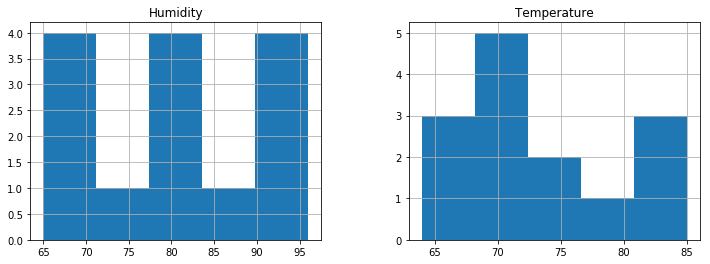

In [84]:
df.hist(['Temperature','Humidity'], bins=5, figsize=(12, 4))

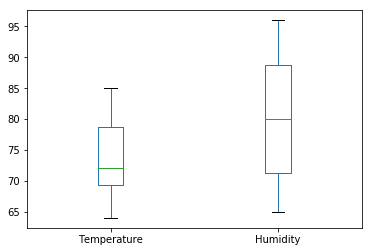

In [85]:
df[['Temperature','Humidity']].plot(kind='box')

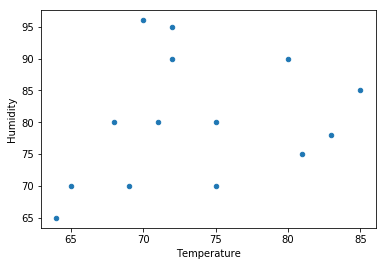

In [86]:
df.plot('Temperature', 'Humidity', kind='scatter')

In [87]:
grouped = df.groupby('Outlook')
for name, group in grouped:
    print (name)

overcast
rain
sunny


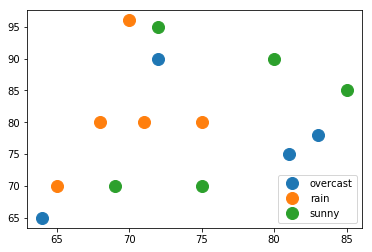

In [88]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in grouped:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')
plt.show()

## Conclusion
- There a literally a billion things you can do in Pandas. 
- It is a powerful too for exploratory data analysis, visualization and organization. 
- It is often my go-to when I start on a new dataset or a new problem.
- Here is one of my favorite all-time pandas resources: [useful pandas snippets](https://gist.github.com/bsweger/e5817488d161f37dcbd2)
- Now go forth and explore!